# Notebook Setup


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [89]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

In [3]:
sns.set()



## Project Overview

Hey there! Welcome to my awesome machine learning project notebook. Let me give you a quick rundown of what we're doing here. I've broken it down into four main phases:

### Phase 1: Data Analyzing
In this phase, we dive deep into our dataset to understand what's going on. We explore the data, check out the distributions, look for missing values, and visualize some cool patterns. Think of it as getting to know your new friends before you start a project together.

### Phase 2: Baseline Modeling (Rule-Based)
Here, we create a simple rule-based model to set a baseline for our predictions. It's like saying, "Okay, let's see how well we can do with some straightforward rules before getting fancy with machine learning." This gives us something to compare our more advanced models against later.

### Phase 3: Logistic Regression Modeling
Now we step up our game with logistic regression. This is our first machine learning model. We'll train it on our data, tweak some parameters, and see how well it performs. Logistic regression is pretty cool for binary classification tasks, so it’s a great plplace to start.

### Phase 4: Multilayer Perceptron (MLP) Modeling
Finally, we pull out the big guns with a neural network! Specifically, a Multilayer Perceptron (MLP). This is where things get really interesting. We’ll tune a bunch of hyperparameters and try to squeeze out every bit of performance we can. Neural networks are powerful, and we're going to show just how powerfey can be.

---

Let's get staking. Happy coding!

# Phase 1: Data Analyzing
In this phase, we dive deep into our dataset to understand what's going on. We explore the data, check out the distributions, look for missing values, and visualize some cool patterns. Think of it as getting to know your new friends before you start a project together.

## Load Data
Here, we load the Iris dataset using scikit-learn's built-in datasets module. The dataset contains information about iris plants, including their sepal and petal dimensions.

In [4]:
data = datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Create DataFrame
We convert the loaded data into a pandas DataFrame for easier manipulation and analysis.


In [10]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])

In [11]:
df["target"] = data["target"]

In [12]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

## Basic Descriptive Statistics
 It's always a good idea to check some basic descriptive statistics for the dataset.

In [13]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

## Visualize Data DistributionThis part includes histograms to visualize the distribution of each feature in the dataset.


In [14]:
df["sepal length (cm)"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

<Axes: >

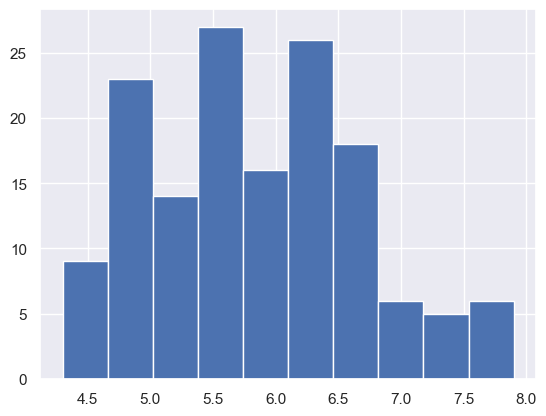

In [15]:
df["sepal length (cm)"].hist()

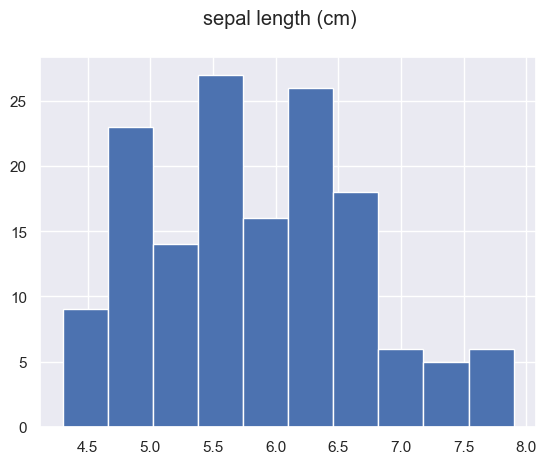

In [16]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

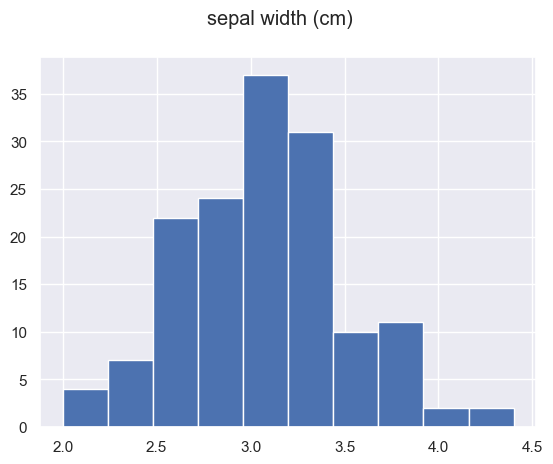

In [17]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

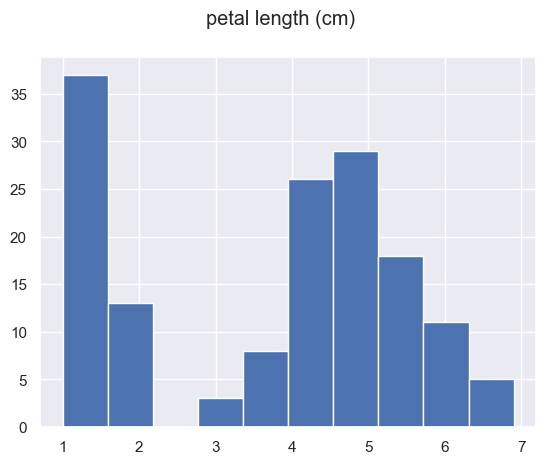

In [18]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

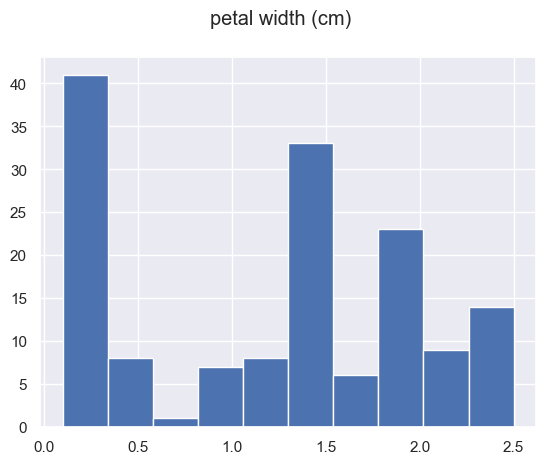

In [19]:
col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

## Relationship of the Data Features with the Target
This section explores how the features in the dataset relate to the target variable, which represents different species of iris flowers.

In [20]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
# create new column with the spicies names
df["target_names"] = df["target"].map({0 : "setosa", 1 : "versicolor", 2 : "virginica"})

## Visualizing RelationshipsIn this part, we visualize the relationship between each feature and the target variable using scatter plots.


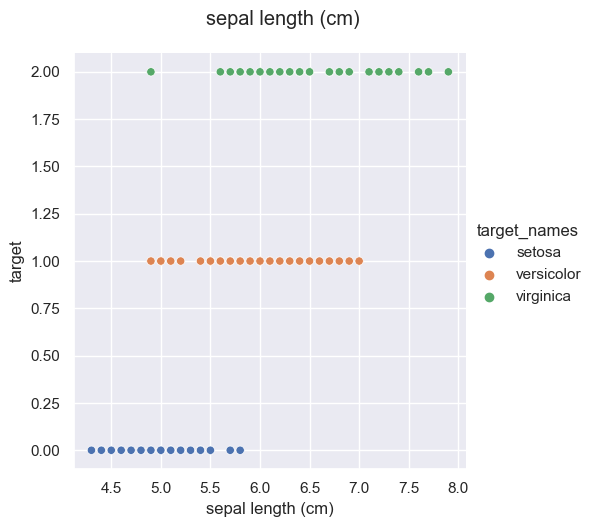

In [22]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

col = "sepal length (cm)"
sns.relplot(x=col, y="target", hue="target_names", data=df)
plt.suptitle(col, y=1.05)
plt.show()

# Reset warnings to default behavior
warnings.resetwarnings()


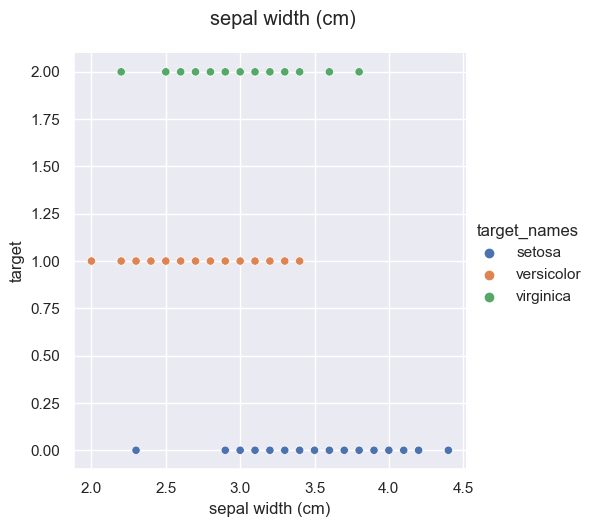

In [23]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

col = "sepal width (cm)"
sns.relplot(x=col, y="target", hue="target_names", data=df)
plt.suptitle(col,y=1.05)
plt.show()

warnings.resetwarnings()

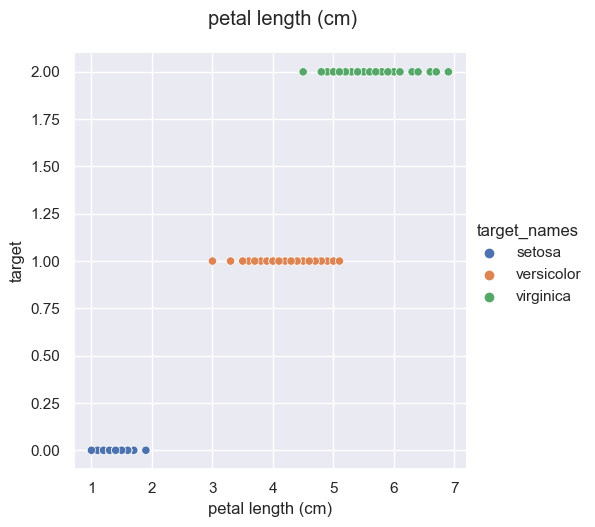

In [24]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

col = "petal length (cm)"
sns.relplot(x=col, y="target", hue="target_names", data=df)
plt.suptitle(col , y=1.05)
plt.show()

warnings.resetwarnings()

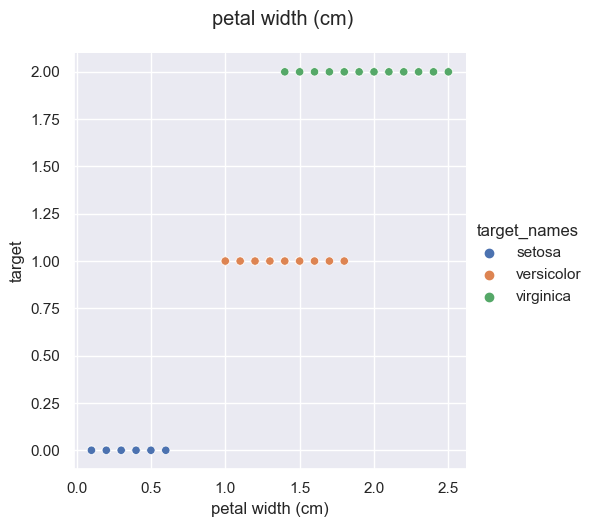

In [25]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

col = "petal width (cm)"
sns.relplot(x=col, y="target", hue="target_names", data=df)
plt.suptitle(col ,  y=1.05)
plt.show()

warnings.resetwarnings()

## Exploratory Data Analysis (EDA) - Pairplots
Pairplots are created here to visualize pairwise relationships between the features, offering a comprehensive overview of the dataset.

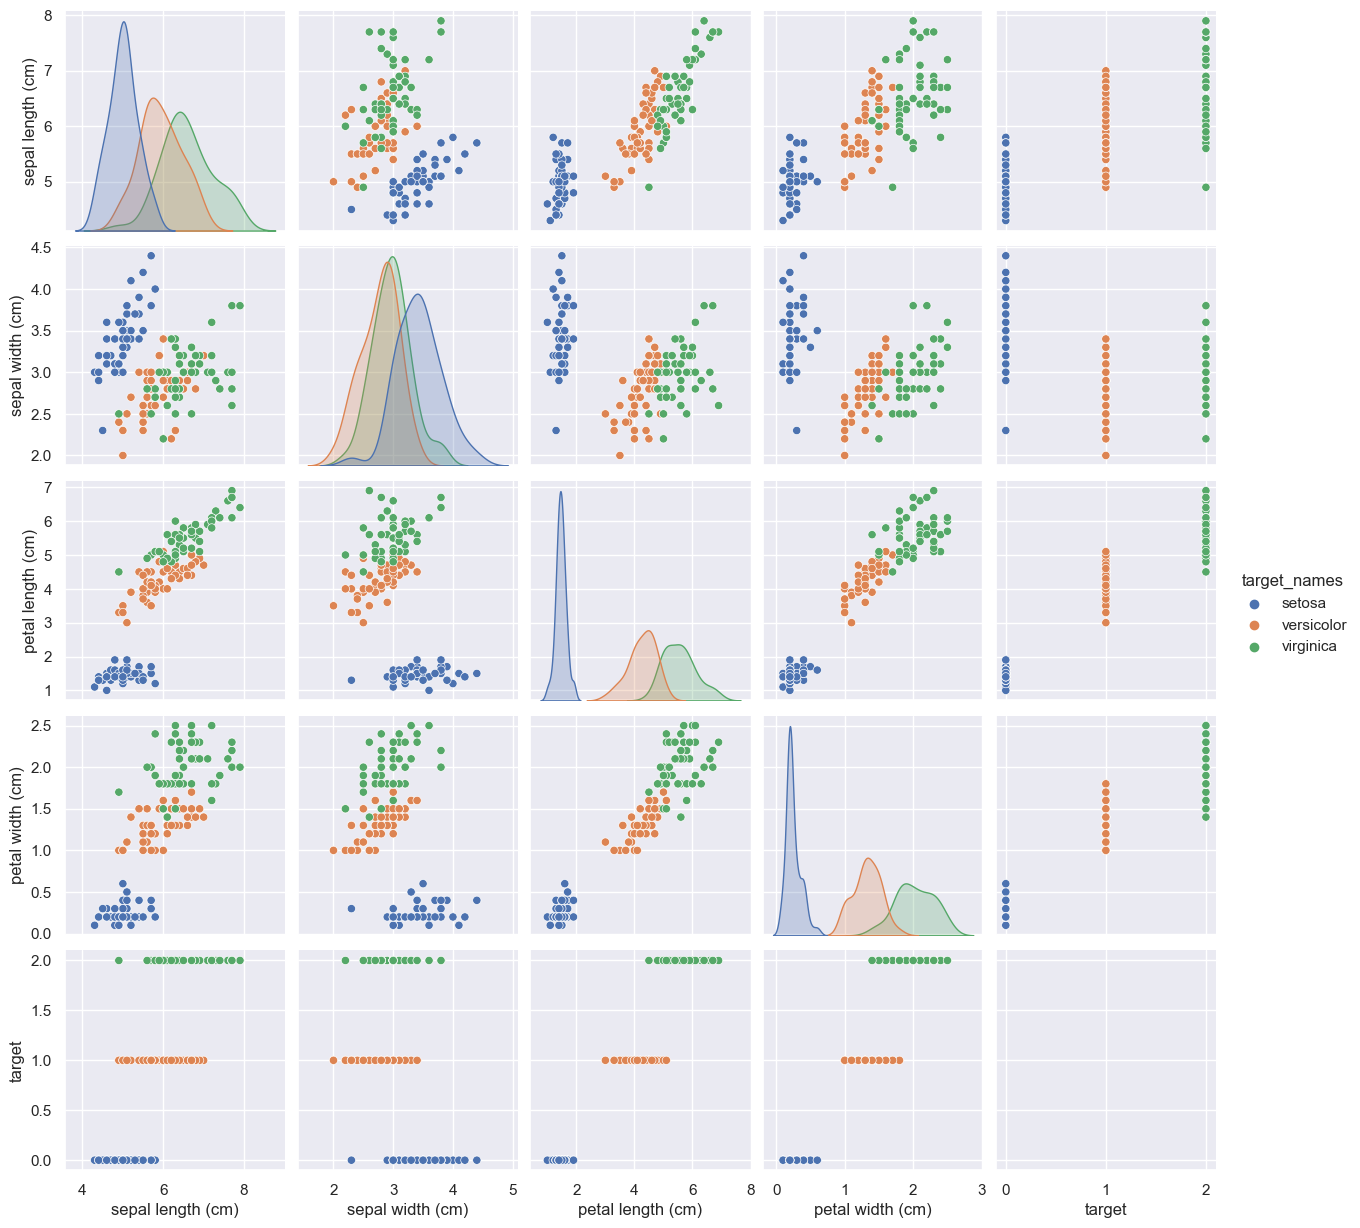

In [26]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(df, hue="target_names")

warnings.resetwarnings()

## Train-Test Split
This part involves splitting the dataset into training and testing sets for model evaluation purposes.


In [27]:
df_train , df_test = train_test_split(df , test_size= 0.2)

In [28]:
df_train.shape

(120, 6)

In [29]:
df_test.shape

(30, 6)

In [30]:
df_train.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
88                 5.6               3.0                4.1               1.3   
141                6.9               3.1                5.1               2.3   
118                7.7               2.6                6.9               2.3   
52                 6.9               3.1                4.9               1.5   
18                 5.7               3.8                1.7               0.3   

     target target_names  
88        1   versicolor  
141       2    virginica  
118       2    virginica  
52        1   versicolor  
18        0       setosa

## Data Preparation
This section focuses on preparing the dataset for modeling by separating features and target labels, which involves dropping unnecessary columns and converting the data into a suitable format for analysis.y

In [31]:
x_train = df_train.drop(columns = ["target" , "target_names"]).values
y_train = df_train["target"].values

In [32]:
y_train

array([1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 1, 1])

In [33]:
x_train

array([[5.6, 3. , 4.1, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [7.7, 2.6, 6.9, 2.3],
       [6.9, 3.1, 4.9, 1.5],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.7, 3.1, 4.7, 1.5],
       [5.9, 3. , 4.2, 1.5],
       [7.2, 3.2, 6. , 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [4.8, 3.4, 1.6, 0.2],
       [6.1, 2.8, 4. , 1.3],
       [5. , 2.3, 3.3, 1. ],
       [7.9, 3.8, 6.4, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3.2, 1.6, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [6.3, 2.3, 4.4, 1.3],
       [6.4, 3.2, 4.5, 1.5],
       [4.4, 2.9, 1.4, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [5.3, 3.7, 1.5, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.3, 3.3, 6. , 2.5],
       [6.4, 2.8, 5.6, 2.1],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [5.5, 2.4, 3.8, 1.1],
       [4.9, 3.1, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [4.3, 3

# Phase 2: Baseline Modeling (Rule-Based)

### what is the simplest model we can think of?
Here, we establish a basic model that serves as a starting point for comparison with more sophisticated models. In this case, we create a simple rule-based model that predicts Iris species based solely on petal lengt.

This gives us something to compare our more advanced models against later.h.

In [34]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
def single_feature_prediction(petal_length):
    '''prediction Iris species by only analyzing petal length.'''
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [36]:
x_train[:,2]

array([4.1, 5.1, 6.9, 4.9, 1.7, 1.4, 3. , 4.7, 4.2, 6. , 1.5, 5.7, 1.6,
       4. , 3.3, 6.4, 5.4, 5.8, 1.4, 1.6, 5.5, 4.4, 4.5, 1.4, 5.9, 1.5,
       1.5, 6. , 5.6, 1.3, 1.6, 3.8, 1.5, 5.6, 1.1, 1.4, 5.1, 5.8, 1.2,
       3.9, 3.7, 4. , 4.9, 1.3, 1.9, 5.7, 1.5, 4.2, 1.4, 1.5, 4.6, 5. ,
       6.1, 4.5, 1.4, 1.7, 5.2, 5.4, 1.4, 1.3, 1.2, 1.4, 4.7, 6.1, 4.2,
       1. , 4.4, 4.8, 4. , 5.1, 4.9, 5.6, 1.5, 5.6, 6.6, 4.2, 4. , 4.4,
       5.3, 6.7, 5.2, 4.5, 1.4, 1.5, 1.4, 4.8, 4.6, 1.5, 6.3, 5.5, 5.3,
       4.8, 1.5, 1.7, 4.8, 1.7, 5.7, 4.7, 4.5, 1.9, 1.4, 4.1, 3.5, 4.5,
       5.5, 5.1, 3.9, 3.5, 5.1, 1.5, 4.4, 4.1, 4.9, 1.4, 4.5, 3.6, 1.6,
       1.4, 4.6, 4.5])

In [37]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in x_train[:, 2]])

In [38]:
y_train

array([1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0,
       1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 1, 1])

In [39]:
manual_y_predictions

array([1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0,
       0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 1, 1])

In [40]:
manual_y_predictions == y_train

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [41]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

In [42]:
print(f"Manual model accuracy: {manual_model_accuracy * 100:.2f}%")

Manual model accuracy: 94.17%


# Phase 3: Logistic Regression Modeling
Now we step up our game with logistic regression. This is our first machine learning model. We'll train it on our data, tweak some parameters, and see how well it performs. Logistic regression is pretty cool for binary classification tasks, so it’s a great place to start.


## Validation Set Evaluation
Before we get too confident, it's crucial to validate our model's performance on unseen data. By splitting our dataset into training and validation sets, we can assess how well our logistic regression model generalizes to new data. This validation process gives us confidence in our model's real-world applicability.

In [43]:
model = LogisticRegression(max_iter=200)

In [44]:
# xt stands for "x_train" and xv stands for "x_validation"
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.2)

In [45]:
model.fit(xt,yt)

LogisticRegression(max_iter=200)

In [46]:
y_pred = model.predict(xv)

In [47]:
np.mean(y_pred == yv)

0.9166666666666666

In [48]:
model.score(xv,yv)

0.9166666666666666

## Cross-Validation Evaluation
To ensure the robustness of our model, we employ cross-validation. By repeatedly training and testing our logistic regression model on different subsets of our data, we obtain a more comprehensive evaluation of its accuracy and reliability. This cross-validation approach provides us with valuable insights into our model's performance across various data splits.


In [49]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [50]:
model = LogisticRegression(max_iter=200)

In [51]:
accuracies = cross_val_score(model, x_train, y_train , cv=5, scoring="accuracy")

In [52]:
accuracies

array([1.        , 0.91666667, 0.95833333, 1.        , 0.875     ])

In [53]:
np.mean(accuracies)

0.95

## Analyzing Misclassifications
Mistakes happen, even in modeling. In this section, we delve into instances where our model misclassifies data points. By identifying and analyzing these misclassifications, we uncover potential weaknesses in our model and areas for improvement. This critical analysis guides us in refining our model and enhancing its predictive capabilities.

In [54]:
y_pred = cross_val_predict(model, x_train, y_train , cv=5)

In [55]:
y_pred

array([1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0,
       2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [56]:
predicted_correctly_mask = y_pred == y_train

In [57]:
predicted_correctly_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [58]:
not_predicted_correctly = ~predicted_correctly_mask

In [59]:
not_predicted_correctly

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [60]:
x_train[not_predicted_correctly]

array([[6. , 2.7, 5.1, 1.6],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.7, 4.9, 1.8]])

## How Do De Find Them On a Plot?

In [61]:
df_predictions = df_train.copy()

In [62]:
df_predictions["correct_predictions"] = predicted_correctly_mask

In [63]:
df_predictions["prediction"] = y_pred

In [64]:
df_predictions["prediction_lable"] = df_predictions["prediction"].map({0 : "setosa", 1 : "versicolor", 2 : "virginica"})

In [65]:
df_predictions.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
88                 5.6               3.0                4.1               1.3   
141                6.9               3.1                5.1               2.3   
118                7.7               2.6                6.9               2.3   
52                 6.9               3.1                4.9               1.5   
18                 5.7               3.8                1.7               0.3   

     target target_names  correct_predictions  prediction prediction_lable  
88        1   versicolor                 True           1       versicolor  
141       2    virginica                 True           2        virginica  
118       2    virginica                 True           2        virginica  
52        1   versicolor                 True           1       versicolor  
18        0       setosa                 True           0           setosa

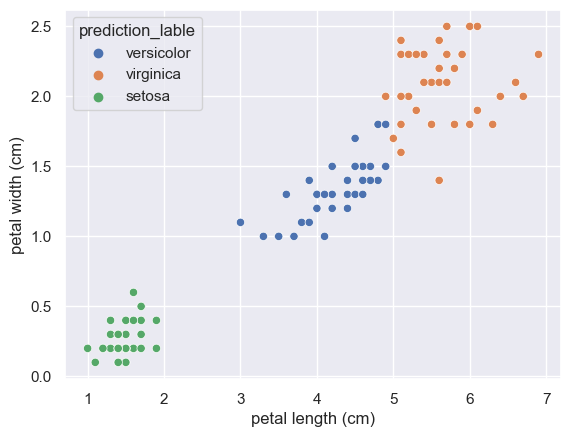

In [66]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.scatterplot(x = "petal length (cm)" ,y= "petal width (cm)" , hue = "prediction_lable", data= df_predictions)
plt.show()

warnings.resetwarnings()

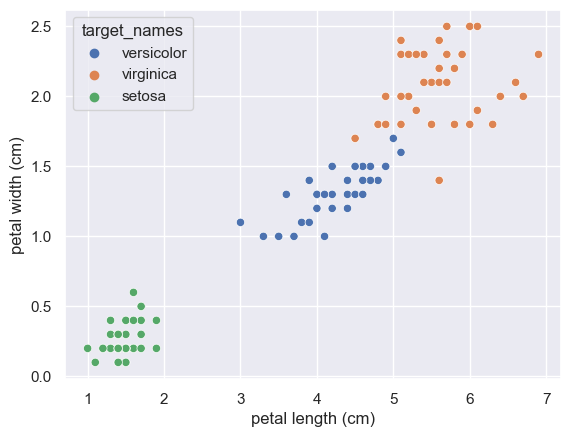

In [67]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.scatterplot(x = "petal length (cm)" , y= "petal width (cm)" , hue = "target_names", data= df_predictions)
plt.show()

warnings.resetwarnings()

In [68]:
def plot_incorrecct_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue = "prediction_lable", data= df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue = "target_names", data= df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue = "correct_predictions", data= df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    plt.show()

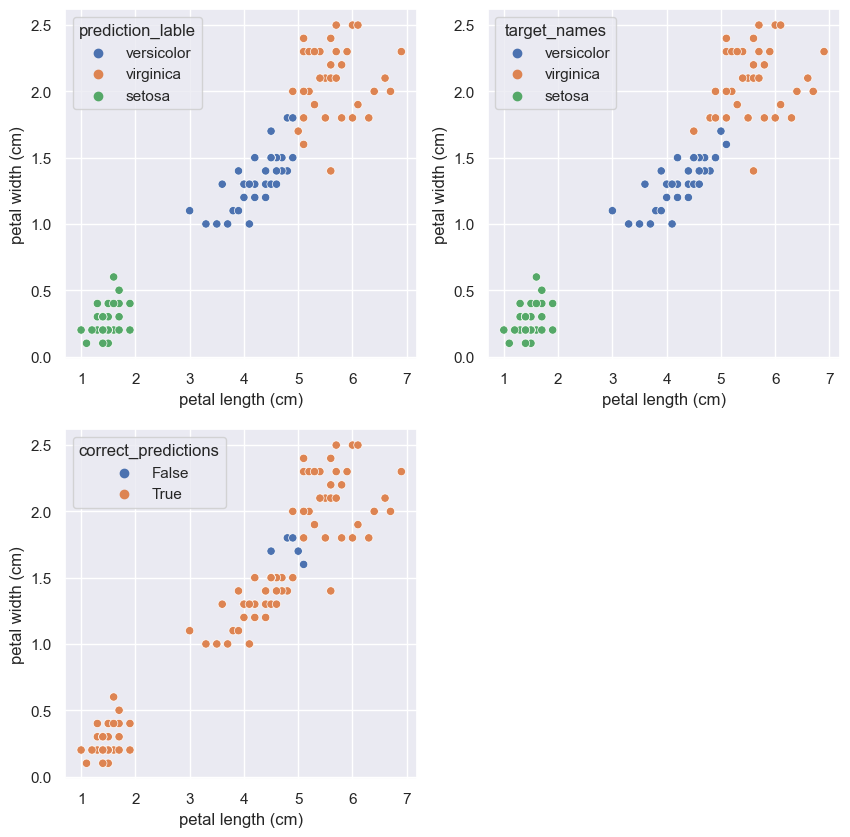

In [69]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plot_incorrecct_predictions(df_predictions, "petal length (cm)", "petal width (cm)")

warnings.resetwarnings()

## Model Tuning: Finding the Right Parameters
 Every model has parameters that can be adjusted to improve performance. Here, we explore different parameter settings for logistic regression, such as regularization strength. By experimenting with various parameter values and evaluating their impact on model accuracy, we fine-tune our logistic regression model for optimal performance.

In [70]:
for reg_param in (0.1, 0.3, 0.7, 1, 1.2, 1.5, 1.7, 2, 4, 5, 6.7, 7,7.2, 8, 12):
    model = LogisticRegression(max_iter=200, C= reg_param)
    accuracies = cross_val_score(model, x_train, y_train , cv=5, scoring="accuracy")
    print(f"Accuraccy: {np.mean(accuracies) * 100:.2f}%")

Accuraccy: 94.17%
Accuraccy: 94.17%
Accuraccy: 94.17%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.00%
Accuraccy: 95.83%
Accuraccy: 95.00%
Accuraccy: 95.00%


## Final Model Evaluation: Fine-Tuned Accuracy

In [71]:
  model = LogisticRegression(max_iter=200, C= 7.2)

## Final Model Evaluation
Here, we evaluate the performance of our final logistic regression model on the test set. We first prepare the test data by extracting features and labels. Then, we fit our model to the training data and make predictions on the test data. Finally, we calculate the accuracy of our model on the test set.

In [72]:
x_test = df_test.drop(columns = ["target" , "target_names"]).values
y_test = df_test["target"].values

In [73]:
x_test.shape

(30, 4)

In [74]:
model.fit(x_train, y_train)

LogisticRegression(C=7.2, max_iter=200)

In [75]:
y_test_pred = model.predict(x_test)

In [76]:
x_test

array([[7.2, 3. , 5.8, 1.6],
       [6.3, 2.8, 5.1, 1.5],
       [7.7, 3.8, 6.7, 2.2],
       [5.7, 2.5, 5. , 2. ],
       [5.1, 3.8, 1.6, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [6. , 2.2, 5. , 1.5],
       [5. , 3. , 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.8, 3.1, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 2.9, 4.3, 1.3],
       [6. , 3.4, 4.5, 1.6],
       [5.8, 2.7, 3.9, 1.2],
       [7.7, 3. , 6.1, 2.3],
       [7.1, 3. , 5.9, 2.1],
       [6.2, 2.9, 4.3, 1.3],
       [5.4, 3.4, 1.5, 0.4],
       [6.3, 3.3, 4.7, 1.6],
       [4.4, 3. , 1.3, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [4.4, 3.2, 1.3, 0.2],
       [6. , 2.2, 4. , 1. ],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.7, 5.1, 1.9],
       [6.1, 2.8, 4.7, 1.2],
       [6.1, 3. , 4.9, 1.8]])

In [77]:
model.predict([[4.5, 2, 3, 2.5], [3, 4 ,5 ,2]])

array([2, 2])

In [78]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [79]:
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}%")

Test set accuracy: 93.33%


In [80]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_predictions"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_lable"] = df_predictions_test["prediction"].map({0 : "setosa", 1 : "versicolor", 2 : "virginica"})

In [81]:
#model.predict_log_proba(4.5, 2, 3, 2.5)

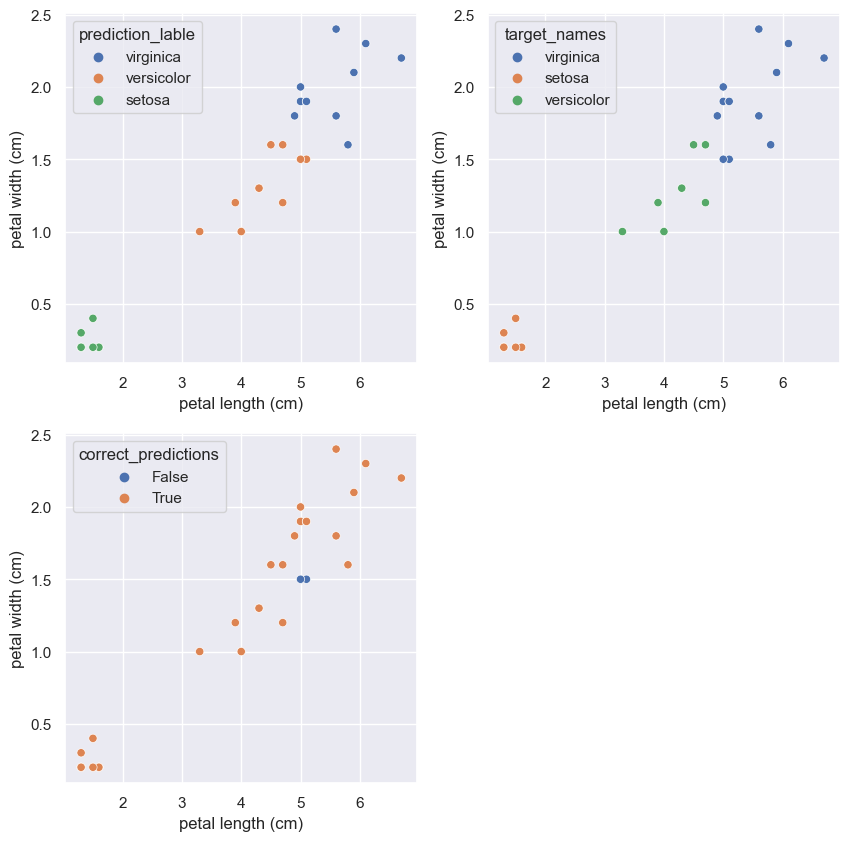

In [82]:
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plot_incorrecct_predictions(df_predictions_test, x_axis_feature="petal length (cm)" , y_axis_feature="petal width (cm)")

warnings.resetwarnings()

## Analyzing Model Weights and Bias
In this section, we delve into the internal workings of our logistic regression model by examining its weights and bias. These parameters provide information on how each feature contributes to the classification decision. Understanding these parameters can help interpret the model's behavior.


In [83]:
weights = model.coef_
bias = model.intercept_

In [84]:
print("Weights:", weights)
print("Bias:", bias)

Weights: [[-0.46281438  1.65006221 -3.70942722 -1.73213284]
 [ 1.02040687 -0.47978973 -0.2006812  -2.26158763]
 [-0.5575925  -1.17027248  3.91010841  3.99372047]]
Bias: [ 13.2641558   2.9178625 -16.1820183]


In [85]:
model.predict([[4.5, 2, 3, 2.5], [3, 4 ,5 ,2]])

array([2, 2])

In [86]:
print("Weights:", weights)
print("Bias:", bias)

Weights: [[-0.46281438  1.65006221 -3.70942722 -1.73213284]
 [ 1.02040687 -0.47978973 -0.2006812  -2.26158763]
 [-0.5575925  -1.17027248  3.91010841  3.99372047]]
Bias: [ 13.2641558   2.9178625 -16.1820183]


In [87]:
log_probs = model.predict_proba([[4.5, 2, 3, 2.5]])

# Print the log probabilities
print("Log Probabilities:", log_probs)

Log Probabilities: [[0.10179641 0.36288077 0.53532282]]


# Phase 4: Multilayer Perceptron (MLP) Modeling
Finally, we pull out the big guns with a neural network! Specifically, a Multilayer Perceptron (MLP). This is where things get really interesting. We’ll tune a bunch of hyperparameters and try to squeeze out every bit of performance we can. Neural networks are powerful, and we're going to show just how powerful they can be.


## Step 1 : Training Model and Model Tuning :
This phase involves the development and refinement of machine learning models. Initially, models are trained using default hyperparameters. Subsequently, model tuning techniques, such as manual exploration, advanced fine-tuning, and automated methods like GridSearchCV or RandomizedSearchCV, are employed to optimize performance. The goal is to enhance the model's accuracy and generalization to new data.

### Create an MLP and Manual Search (Hyperparameter Tuning)
#### First Method : (Exploring Hyperparameter Space Manually)
Manually experiment with hyperparameter values to find the optimal configuration for your model. Requires domain knowledge and intuition.


In [90]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Loop over regularization parameter, hidden layer sizes, and learning rate
for reg_param in [0.001, 0.01, 0.1, 1, 1.05, 0.2, 0.5]:
    for hidden_layer_sizes in [(100, 50, 25)]:
        for learning_rate in ['adaptive', 'constant']:
            start_time = time.time()  # Record the start time
            
            mlp_model = MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                max_iter=1500,
                random_state=42,
                alpha=reg_param,
                learning_rate=learning_rate,
                early_stopping=True,
                n_iter_no_change=20,
                tol=1e-6,
                verbose=False
            )

            # Cross-validation
            accuracies = cross_val_score(mlp_model, x_train_scaled, y_train, cv=5, scoring="accuracy")

            end_time = time.time()  # Record the end time
            training_time = end_time - start_time  # Calculate training time
            
            print(f"Alpha: {reg_param}, Hidden Layers: {hidden_layer_sizes}, Learning Rate: {learning_rate}, Accuracy: {np.mean(accuracies) * 100:.2f}%, Training Time: {training_time:.2f} seconds")

Alpha: 0.001, Hidden Layers: (100, 50, 25), Learning Rate: adaptive, Accuracy: 86.67%, Training Time: 0.16 seconds
Alpha: 0.001, Hidden Layers: (100, 50, 25), Learning Rate: constant, Accuracy: 86.67%, Training Time: 0.14 seconds
Alpha: 0.01, Hidden Layers: (100, 50, 25), Learning Rate: adaptive, Accuracy: 86.67%, Training Time: 0.15 seconds
Alpha: 0.01, Hidden Layers: (100, 50, 25), Learning Rate: constant, Accuracy: 86.67%, Training Time: 0.15 seconds
Alpha: 0.1, Hidden Layers: (100, 50, 25), Learning Rate: adaptive, Accuracy: 86.67%, Training Time: 0.15 seconds
Alpha: 0.1, Hidden Layers: (100, 50, 25), Learning Rate: constant, Accuracy: 86.67%, Training Time: 0.14 seconds
Alpha: 1, Hidden Layers: (100, 50, 25), Learning Rate: adaptive, Accuracy: 87.50%, Training Time: 0.15 seconds
Alpha: 1, Hidden Layers: (100, 50, 25), Learning Rate: constant, Accuracy: 87.50%, Training Time: 0.15 seconds
Alpha: 1.05, Hidden Layers: (100, 50, 25), Learning Rate: adaptive, Accuracy: 87.50%, Training

### More Advanced Way for Manual Search (Hyperparameter Tuning)
#### Second Method : (Fine-Tuning with Advanced Manual Search)
Conduct a more refined manual search by systematically adjusting hyperparameters based on insights gained from the initial exploration.


In [91]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Initialize variables to track the best parameters and accuracy
best_params = None
best_accuracy = 0.0

# Loop over regularization parameter and hidden layer sizes
for reg_param in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
    for hidden_layer_sizes in [(50,), (100,), (50, 50), (100, 50, 25)]:
        mlp_model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            max_iter=1000,  # Increase max_iter
            random_state=42,
            alpha=reg_param,
            learning_rate='adaptive',
            early_stopping=True,
            n_iter_no_change=20,
            tol=1e-4,
            verbose=False
        )

        # Cross-validation
        accuracies = cross_val_score(mlp_model, x_train_scaled, y_train, cv=5, scoring="accuracy")
        mean_accuracy = np.mean(accuracies)

        # Print intermediate results
        print(f"Parameters: Alpha={reg_param}, Hidden Layer Sizes={hidden_layer_sizes}")
        print(f"Cross-Validation Accuracies: {accuracies}")
        print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")

        # Check if the current parameters result in a better accuracy
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_params = {'alpha': reg_param, 'hidden_layer_sizes': hidden_layer_sizes}

# Print the best parameters and corresponding accuracy
print("\nBest Parameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")

Parameters: Alpha=0.0001, Hidden Layer Sizes=(50,)
Cross-Validation Accuracies: [0.83333333 0.875      0.83333333 0.83333333 0.70833333]
Mean Accuracy: 81.67%
Parameters: Alpha=0.0001, Hidden Layer Sizes=(100,)
Cross-Validation Accuracies: [0.75       0.83333333 0.75       0.83333333 0.79166667]
Mean Accuracy: 79.17%
Parameters: Alpha=0.0001, Hidden Layer Sizes=(50, 50)
Cross-Validation Accuracies: [0.66666667 0.75       0.70833333 0.91666667 0.79166667]
Mean Accuracy: 76.67%
Parameters: Alpha=0.0001, Hidden Layer Sizes=(100, 50, 25)
Cross-Validation Accuracies: [0.91666667 0.91666667 0.83333333 0.95833333 0.70833333]
Mean Accuracy: 86.67%
Parameters: Alpha=0.001, Hidden Layer Sizes=(50,)
Cross-Validation Accuracies: [0.83333333 0.875      0.83333333 0.83333333 0.70833333]
Mean Accuracy: 81.67%
Parameters: Alpha=0.001, Hidden Layer Sizes=(100,)
Cross-Validation Accuracies: [0.75       0.83333333 0.75       0.83333333 0.79166667]
Mean Accuracy: 79.17%
Parameters: Alpha=0.001, Hidden Lay

### Systematic (Automatic) Hyperparameter Search#### Third Method : (Automated Hyperparameter Optimization using GridSearchCV)
Automate the hyperparameter tuning process by exhaustively searching a predefined hyperparameter grid. GridSearchCV systematically evaluates all possible combinations.
Takes a lot of time not recommended.


In [95]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Define an extended parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],  # Additional activation functions to explore
    'solver': ['adam', 'sgd'],  # Different solvers for weight optimization
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate strategies
    'max_iter': [500, 1000, 1500],  # Different maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for optimization
}

# Create MLPClassifier
mlp_model = MLPClassifier(
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20,
    verbose=False
)

# Create GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model with hyperparameter tuning
grid_search.fit(x_train_scaled, y_train)

# Print best parameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy * 100:.2f}%")

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam', 'tol': 0.001}, Best Accuracy: 89.17%


### Systematic (Automatic) Hyperparameter Search
#### Fourth Method : (Automated Hyperparameter Optimization using RandomizedSearchCV)
Employ a randomized search approach for automated hyperparameter tuning. RandomizedSearchCV explores a defined hyperparameter space by randomly sampling configurations, making it more computationally efficient than GridSearchCV.


In [96]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'alpha': [1e-6, 1e-5, 1e-4, 0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'logistic'],  # Different activation functions
    'solver': ['adam', 'sgd'],  # Different solvers
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedules
    'momentum': [0.9, 0.95, 0.99],  # Momentum values (if lver is 'sgd')
    'beta_1': [0.9, 0.95, 0.99],  # Beta 1 values (if solver is 'adsoam')
    'beta_2': [0.99, 0.999],  # Beta 2 values (if solver is 'adam')
    'epsilon': [1e-8, 1e-7, 1e-6],  # Epsilon values (if solver is 'adam')
    'early_stopping': [True, False],
    'batch_size': [16, 32, 64, 128],  # Batch size
}


# Create MLPClassifier
mlp_model = MLPClassifier(
    max_iter=1000,
    random_state=42,
    learning_rate='adaptive',
    early_stopping=True,
    n_iter_no_change=20,
    tol=1e-4,
    verbose=False
)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(mlp_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)

# Fit the model with hyperparameter tuning
random_search.fit(x_train_scaled, y_train)

# Print best parameters and corresponding accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_
print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy * 100:.2f}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\user\miniconda3\envs\project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\user\miniconda3\envs\project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\user\miniconda3\envs\project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\user\miniconda3\envs\project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\user\miniconda3\envs\project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609

Best Parameters: {'solver': 'sgd', 'momentum': 0.99, 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50, 25), 'epsilon': 1e-06, 'early_stopping': False, 'beta_2': 0.999, 'beta_1': 0.95, 'batch_size': 16, 'alpha': 1e-06, 'activation': 'logistic'}, Best Accuracy: 96.67%


## Step 2 : Testing Model and Evaluate Test Accuracy
In this phase, the trained machine learning model is tested on a separate set of data, known as the test dataset, to assess its performance on unseen samples. The accuracy of the model is evaluated by comparing its predictions to the actual outcomes in the test data. This step ensures that the model generalizes well and provides reliable predictions on new, unseen data.

In [97]:
x_test_scaled = scaler.transform(x_test)

### Final model and Test for Manual Search

In [98]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create MLPClassifier with the best hyperparameters
best_mlp_model = MLPClassifier(
    alpha=1,
    hidden_layer_sizes=(100, 50, 25),
    learning_rate='constant',
    max_iter=1000,  # You can adjust max_iter based on your preference
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20,
    tol=1e-4,
    verbose=False
)

# Train the model on the entire training dataset
best_mlp_model.fit(x_train_scaled, y_train)

MLPClassifier(alpha=1, early_stopping=True, hidden_layer_sizes=(100, 50, 25),
              max_iter=1000, n_iter_no_change=20, random_state=42)

In [99]:
# Make predictions on the test set
y_pred = best_mlp_model.predict(x_test_scaled)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 76.67%


### Final model and Test for Grid Search
After conducting a grid search to find optimal hyperparameters for a machine learning model, the best combination is selected. The final model is then trained using these hyperparameters on the entire training dataset. Subsequently, the model is tested on a separate test dataset to assess its performance and accuracy.


In [100]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create MLPClassifier with the best hyperparameters
gs_final_mlp_model = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(100, 50, 25),
    learning_rate='constant',
    max_iter=500,
    solver='adam',
    tol=0.001,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=20,
    verbose=False
)

# Train the model on the entire training dataset
gs_final_mlp_model.fit(x_train_scaled, y_train)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(100, 50, 25), max_iter=500,
              n_iter_no_change=20, random_state=42, tol=0.001)

In [101]:
y_test_pred = gs_final_mlp_model.predict(x_test_scaled)

In [102]:
test_set_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy: {test_set_accuracy * 100:.2f}%")

Test set accuracy: 73.33%


### Final model and Test for Random Search
Similar to grid search, random search explores hyperparameter space to find the best combination for a machine learning model. Once the optimal hyperparameters are identified, the final model is trained using these parameters on the full training dataset. The model's performance is then evaluated on a test dataset to ensure its effectiveness in making predictions on new, unseen data.




In [103]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create MLPClassifier with specific parameters
rs_final_mlp_model = MLPClassifier(
    solver='sgd',                 # Optimizer for weight optimization
    momentum=0.99,                # Momentum for the stochastic gradient descent optimizer
    learning_rate='constant',     # Learning rate strategy ('constant' in this case)
    hidden_layer_sizes=(100, 50, 25),  # Architecture of the neural network (number of neurons in each hidden layer)
    epsilon=1e-06,                # Value added to the denominator for numerical stability
    early_stopping=False,         # Whether to use early stopping to terminate training
    batch_size=16,                # Size of minibatches for stochastic optimizers
    alpha=1e-06,                  # L2 regularization strength
    activation='logistic',        # Activation function for the hidden layers
    max_iter=1000,                # Maximum number of iterations/epochs
    random_state=42,              # Seed for random number generation (for reproducibility)
    tol=1e-4,                     # Tolerance for optimization (stopping criterion)
    verbose=False,                # Whether to print progress messages during training
    beta_1=0.95,                  # Beta 1 values (if solver is 'adam')
    beta_2=0.999                  # Beta 2 values (if solver is 'adam')
)

# Assuming x_train_scaled and y_train are defined
rs_final_mlp_model.fit(x_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=1e-06, batch_size=16, beta_1=0.95,
              epsilon=1e-06, hidden_layer_sizes=(100, 50, 25), max_iter=1000,
              momentum=0.99, random_state=42, solver='sgd')

In [104]:
# Make predictions on the test set
y_pred = rs_final_mlp_model.predict(x_test_scaled)

In [106]:
# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")

Test Set Accuracy: 30.00%
